# LOAD THE IMPORTANT LIBRARIES

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

# LOAD THE DATASETS

In [3]:
# Load the data
my_data = pd.read_csv('hotel_bookings.csv')
my_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

# EXPLORATORY DATA ANALYSIS

In [4]:
# check data information
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#display the shape of dataset
my_data.shape

(119390, 32)

In [6]:
#Descriptive statistic summary
my_data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [7]:
hotel_data =my_data.fillna(value =0).copy()
display(hotel_data)

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    0.0     0.0   
1                          0       2  ...    No Deposit    0.0     0.0   
2                          1       1  ...    No Deposit    0.0     0.0   
3                          1       1  ...    No Deposit  304.0     0.0   
4                          2       2  ...    No Deposit  240.0     0.0   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     0.0   
119386                     5       3  ...    No Deposit    9.0     0.0   
119387                     5       2  ...    No Deposit    9.0     0.0   
119388                     5       2  ...    No Deposit   89.0     0.0   
119389                     7       2  ...    No Deposit    9.0     0.0   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [8]:
print ("Number of rows in the dataset  : " ,hotel_data.shape[0])
print ("Number of Columns in the dataset : " ,hotel_data.shape[1])
print ("Number of Features : \n" ,hotel_data.columns.tolist())
print ("Missing values :  ", hotel_data.isnull().sum())
print ("Unique values :  \n",hotel_data.nunique())

Number of rows in the dataset  :  119390
Number of Columns in the dataset :  32
Number of Features : 
 ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']
Missing values :   hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_i

# DATA VISUALIZATION

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


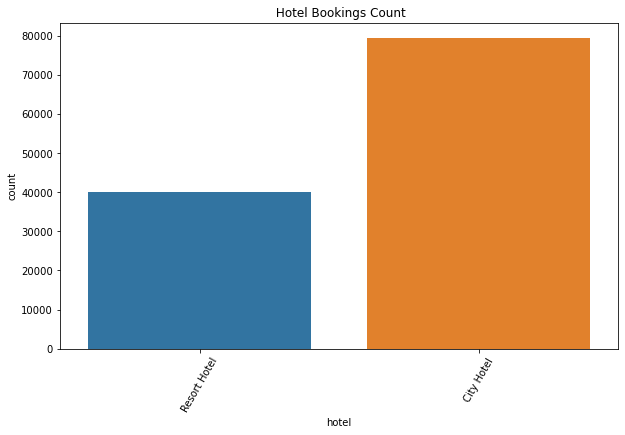

In [9]:
# Hotel type distribution
count_hotel_type = my_data['hotel'].value_counts(ascending=False)
print(count_hotel_type)
#count_hotel_type.plot(kind ='bar');
plt.figure(figsize=(10,6))
plt.xticks(rotation = 60)
plt.title(' Hotel Bookings Count')
sns.countplot(x=my_data['hotel']);

In [10]:
resort_hotel_data =my_data[my_data['hotel']=='Resort Hotel']

In [11]:
resort_hotel_booking_per_year =resort_hotel_data['arrival_date_year'].value_counts(ascending=False)
print(resort_hotel_booking_per_year)
#resort_hotel_booking_per_year.plot(kind ='bar');

2016    18567
2017    13179
2015     8314
Name: arrival_date_year, dtype: int64


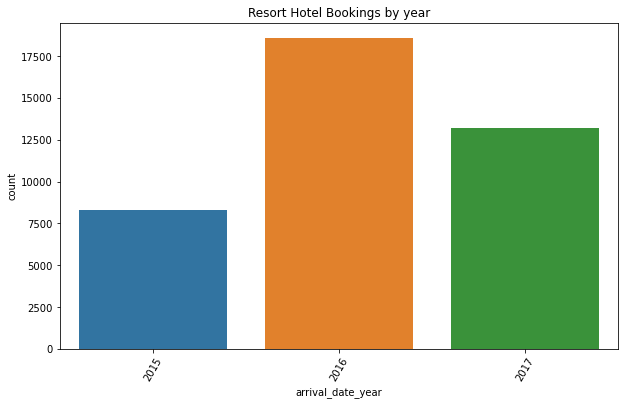

In [12]:
plt.figure(figsize=(10,6))
plt.xticks(rotation = 60)
plt.title('Resort Hotel Bookings by year')
sns.countplot(x=resort_hotel_data['arrival_date_year']);

In [13]:
city_hotel_data =my_data[my_data['hotel']=='City Hotel']
#city_hotel_data

In [14]:
city_hotel_booking_per_year = city_hotel_data['arrival_date_year'].value_counts(ascending=False)
print(city_hotel_booking_per_year)
#city_hotel_booking_per_year.plot(kind ='bar');

2016    38140
2017    27508
2015    13682
Name: arrival_date_year, dtype: int64


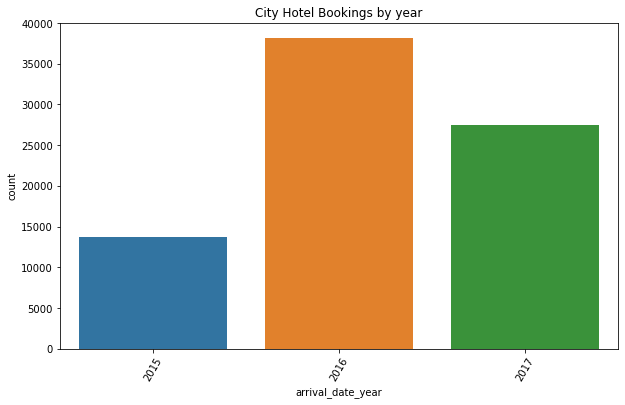

In [15]:
plt.figure(figsize=(10,6))
plt.xticks(rotation = 60)
plt.title('City Hotel Bookings by year')
sns.countplot(x=city_hotel_data['arrival_date_year']);

In [16]:
resort_hotel_booking_per_month =resort_hotel_data['arrival_date_month'].value_counts(ascending=False)
print(resort_hotel_booking_per_month)

August       4894
July         4573
April        3609
May          3559
October      3555
March        3336
September    3108
February     3103
June         3045
December     2648
November     2437
January      2193
Name: arrival_date_month, dtype: int64


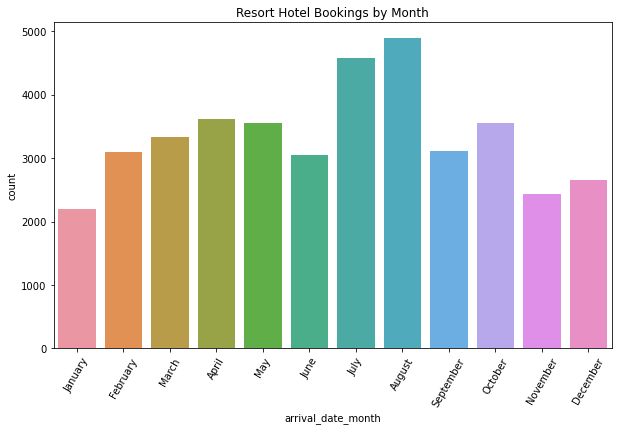

In [17]:
order = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(10,6))
plt.xticks(rotation = 60)
plt.title('Resort Hotel Bookings by Month')
sns.countplot(x=resort_hotel_data['arrival_date_month'], order =order);

In [18]:
city_hotel_booking_per_month =city_hotel_data['arrival_date_month'].value_counts(ascending=False)
print(city_hotel_booking_per_month)


August       8983
May          8232
July         8088
June         7894
October      7605
April        7480
September    7400
March        6458
February     4965
November     4357
December     4132
January      3736
Name: arrival_date_month, dtype: int64


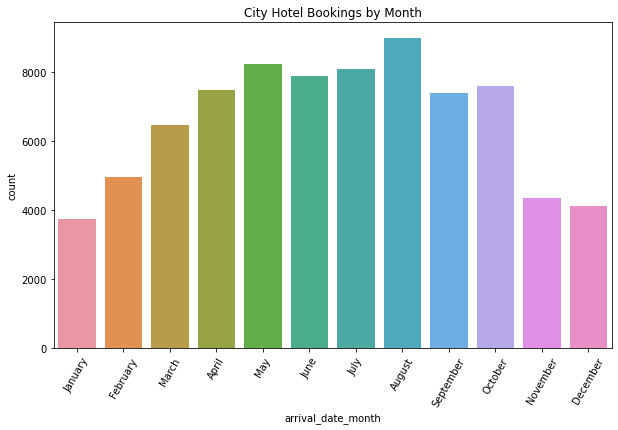

In [19]:
order = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(10,6))
plt.xticks(rotation = 60)
plt.title('City Hotel Bookings by Month')
sns.countplot(x=city_hotel_data['arrival_date_month'], order =order);


# Data Cleaning and manipulation

In [20]:
# List all categorical features
features_cat = [
    "hotel", "arrival_date_month", "meal", "market_segment", "distribution_channel", 
    "reserved_room_type", "deposit_type", "customer_type"
]
# Encoding the categorical features using the map function 
my_data['hotel'] = my_data['hotel'].map({'Resort Hotel':1, 'City Hotel':0})
my_data['arrival_date_month'] = my_data['arrival_date_month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
my_data['meal'] = my_data['meal'].map({'BB':1, 'FB':2, 'HB':3, 'SC':4, 'Undefined':5})
my_data['market_segment'] = my_data['market_segment'].map({'Direct':1, 'Corporate':2, 'Online TA':3, 'Offline TA/TO':4,
       'Complementary':5, 'Groups':6, 'Undefined':7, 'Aviation':8})
my_data['distribution_channel'] = my_data['distribution_channel'].map({'Direct':1, 'Corporate':2, 'TA/TO':3, 'Undefined':4, 'GDS':5})
my_data['reserved_room_type'] = my_data['reserved_room_type'].map({'C':1, 'A':2, 'D':3, 'E':4, 'G':5, 'F':6, 'H':7, 'L':8, 'P':9, 'B':10})
my_data['assigned_room_type'] = my_data['assigned_room_type'].map({'C':1, 'A':2, 'D':3, 'E':4, 'G':5, 'F':6, 'I':7, 'B':8, 'H':9, 'P':10, 'L':11, 'K':12})
my_data['deposit_type'] = my_data['deposit_type'].map({'No Deposit':1, 'Refundable':2, 'Non Refund':3})
my_data['customer_type'] = my_data['customer_type'].map({'Transient':1, 'Contract':2, 'Transient-Party':3, 'Group':4})
my_data['reservation_status'] = my_data['reservation_status'].map({'Check-Out':1, 'Canceled':2, 'No-Show':3})


In [21]:
# create a sub-dataset
new_data =my_data.drop(['is_canceled','country','reservation_status_date','reservation_status'],axis=1).copy()
new_data =new_data.fillna(value =0).copy()

In [22]:
#Seperate teh features from targets
X =new_data
y =my_data['is_canceled']
type(y)

pandas.core.series.Series

# Split the Data

In [24]:
from sklearn.model_selection import train_test_split
#Train/test split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train

hotel  lead_time  arrival_date_year  arrival_date_month  \
67702       0         64               2017                   5   
115851      0         34               2017                   7   
57345       0          8               2016                   9   
11622       1        251               2017                   5   
33333       1         23               2017                   2   
...       ...        ...                ...                 ...   
76820       0          2               2016                   7   
110268      0         91               2017                   4   
103694      0         74               2016                  12   
860         1        130               2015                   8   
15795       1         16               2015                   7   

        arrival_date_week_number  arrival_date_day_of_month  \
67702                         18                          6   
115851                        28                         10   
57345                         39                         24   
11622                         21                         21   
33333                          7                         18   
...                          ...                        ...   
76820                         28                          8   
110268                        16                         20   
103694                        53                         27   
860                           31                          1   
15795                         31                         31   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
67702                         2                     1       3       0.0  ...   
115851                        1                     1       2       1.0  ...   
57345                         1                     1       2       2.0  ...   
11622                         2                     4       2       0.0  ...   
33333                         1                     1       2       0.0  ...   
...                         ...                   ...     ...       ...  ...   
76820                         0                     1       2       0.0  ...   
110268                        2                     3       2       0.0  ...   
103694                        0                     3       3       0.0  ...   
860                           2                     5       2       0.0  ...   
15795                         0                     2       1       0.0  ...   

        assigned_room_type  booking_changes  deposit_type  agent  company  \
67702                    3                0             1    9.0      0.0   
115851                   2                0             1   14.0      0.0   
57345                    6                0             1    9.0      0.0   
11622                    4                0             1    0.0      0.0   
33333                    3                0             1  241.0      0.0   
...                    ...              ...           ...    ...      ...   
76820                    2                1             1    0.0     40.0   
110268                   3                0             1    9.0      0.0   
103694                   2                0             1   22.0      0.0   
860                      2                0             1  240.0      0.0   
15795                    2                0             1    0.0      0.0   

        days_in_waiting_list  customer_type     adr  \
67702                      0              1  189.00   
115851                     0              1  146.00   
57345                      0              1  259.00   
11622                      0              1   89.70   
33333                      0              1   42.43   
...                      ...            ...     ...   
76820                      0              1   77.00   
110268                     0              1  135.00   
103694                     0              1   92.65   
860       

# Scale the Data

In [25]:
# scale the features so that all data can be uniformly evaluated
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Cross validation and Model Comparison

In [26]:
# Compare Algorithm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SV
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore')


In [27]:
# Prepare the model
models = []
models.append(('LR',LogisticRegression()))
models.append(('RDF',RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# Evaluate each model 
results = []
names = []
#scoring ='accuracy'
for name,model in models:
    
        kfold = KFold(n_splits =10,random_state =7,shuffle = True)
        cv_result =cross_validate(model,X_train_scaled,y_train, cv =kfold,scoring=['f1','accuracy'])
        results.append(cv_result)
        names.append(name)
        f1_scores = cv_result['test_f1']
        accuracy_scores = cv_result['test_accuracy']
        #mag = "Mean score of %0.2f with a standard deviation of %0.2f"%(name,cv_result.keys(),cv_result.std())
        mag = "%s:%f (%f) ACCURACY: %f (%f)" %(name,f1_scores.mean(), f1_scores.std(),accuracy_scores.mean(), accuracy_scores.std())
        print(mag)
        #mag_1 = "%s:%0.2f (%0.2f)" %(name,r2_scores.mean(), r2_scores.std())
        #print(mag_1)

LR:0.630315 (0.004600) ACCURACY: 0.783169 (0.002443)
RDF:0.816996 (0.005656) ACCURACY: 0.873074 (0.003349)
KNN:0.739597 (0.004963) ACCURACY: 0.814589 (0.003711)
DTC:0.770520 (0.003499) ACCURACY: 0.828859 (0.002138)
NB:0.588557 (0.004075) ACCURACY: 0.513988 (0.003875)


# Train the Random Forest Classifier and Hypereparameter Tunning

In [33]:
# Build a random forest classifier and fit the model on training set
clf_rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [34]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [35]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=clf_rfc,
                           param_grid=params,
                           cv = 2,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [36]:
%%time
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits
CPU times: total: 24.3 s
Wall time: 5min 43s


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [38]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [128]:
clf_rcf_tun=RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42).fit(X_train, y_train)

# Evaluate the Model

In [40]:
# Predict on test set
y_pred_rfc = clf_rcf_tun.predict(X_test)
y_pred_rfc

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     14907
           1       0.89      0.71      0.79      8971

    accuracy                           0.86     23878
   macro avg       0.87      0.83      0.84     23878
weighted avg       0.86      0.86      0.85     23878



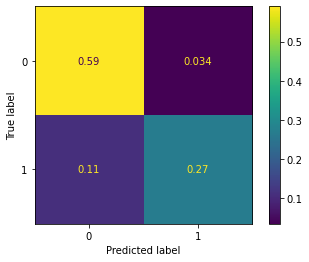

In [43]:
# Evaluate the random forest classifier using confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_rcf_tun,X_test,y_test, normalize ="all")
print(classification_report(y_test,y_pred_rfc))

# Random Forest Feature Importance

In [44]:
print("Model coefficients of importance:\n")
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=",clf_rcf_tun.feature_importances_[i].round(5))
    

Model coefficients of importance:

hotel = 0.01047
lead_time = 0.12092
arrival_date_year = 0.01947
arrival_date_month = 0.0181
arrival_date_week_number = 0.03022
arrival_date_day_of_month = 0.02622
stays_in_weekend_nights = 0.01118
stays_in_week_nights = 0.01915
adults = 0.00827
children = 0.00359
babies = 0.00015
meal = 0.00864
market_segment = 0.06637
distribution_channel = 0.01934
is_repeated_guest = 0.00178
previous_cancellations = 0.06702
previous_bookings_not_canceled = 0.00588
reserved_room_type = 0.01114
assigned_room_type = 0.02184
booking_changes = 0.0276
deposit_type = 0.21848
agent = 0.06071
company = 0.00557
days_in_waiting_list = 0.00361
customer_type = 0.04378
adr = 0.05283
required_car_parking_spaces = 0.03603
total_of_special_requests = 0.08162


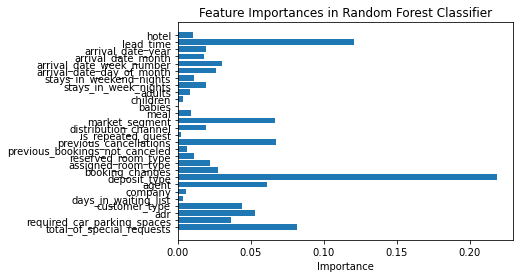

In [45]:
# Get the importance scores of all features
importances = clf_rcf_tun.feature_importances_

# Create bar chart to visualize the feature importances
fig, ax = plt.subplots()
ax.barh(X_train.columns, importances)
ax.invert_yaxis()  # Show the most important feature at the top
ax.set_xlabel('Importance')
ax.set_title('Feature Importances in Random Forest Classifier')

plt.show()

# Partial Dependency Plot

In [46]:
import shap 

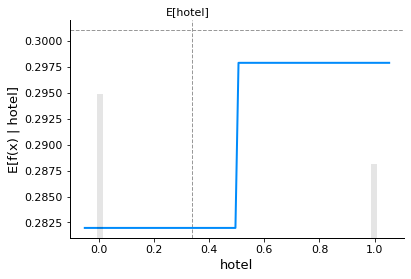

In [47]:
# make a standard partial dependence plot
# for hotel feature
shap.plots.partial_dependence(
    "hotel", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

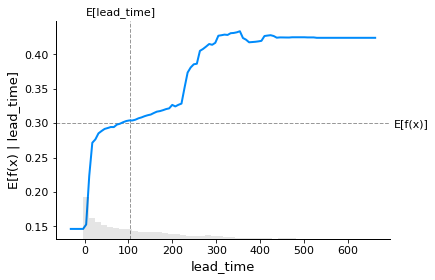

In [48]:
shap.plots.partial_dependence(
    "lead_time", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

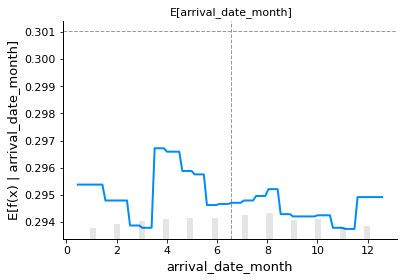

In [49]:
shap.plots.partial_dependence(
    "arrival_date_month", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

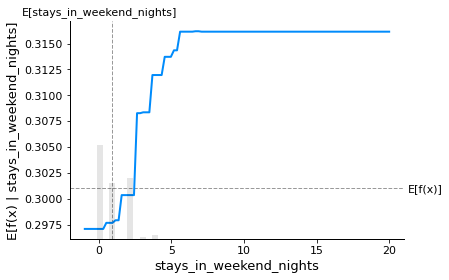

In [50]:
shap.plots.partial_dependence(
    "stays_in_weekend_nights", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

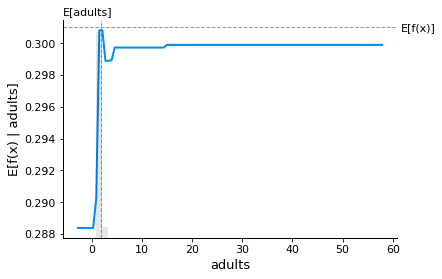

In [51]:
shap.plots.partial_dependence(
    "adults", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

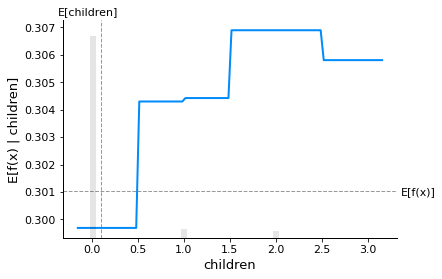

In [52]:
shap.plots.partial_dependence(
    "children", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

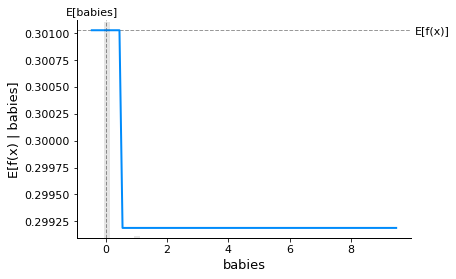

In [53]:
shap.plots.partial_dependence(
    "babies", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

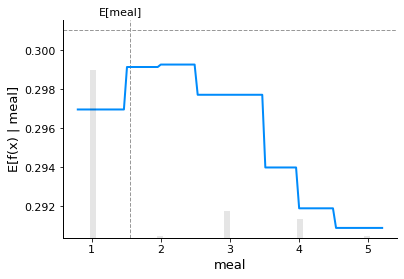

In [54]:
shap.plots.partial_dependence(
    "meal", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

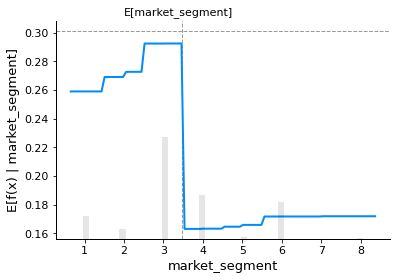

In [55]:
shap.plots.partial_dependence(
    "market_segment", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

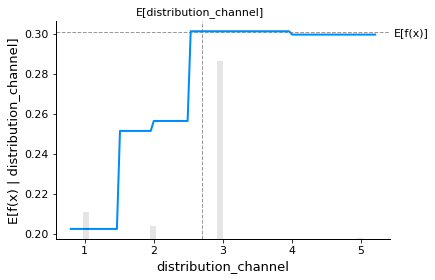

In [56]:
shap.plots.partial_dependence(
    "distribution_channel", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

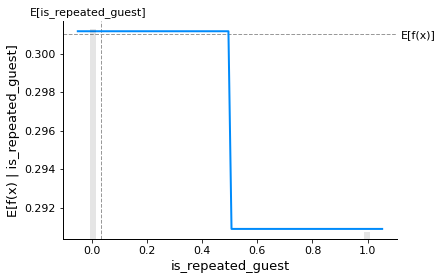

In [57]:
shap.plots.partial_dependence(
    "is_repeated_guest", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

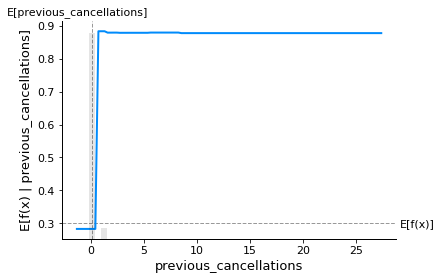

In [58]:
shap.plots.partial_dependence(
    "previous_cancellations", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

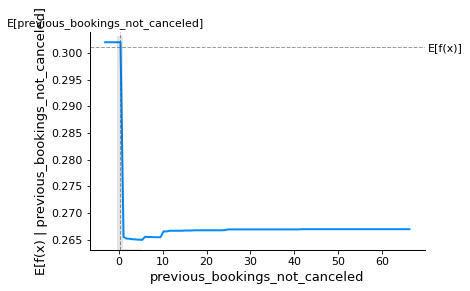

In [59]:
shap.plots.partial_dependence(
    "previous_bookings_not_canceled", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

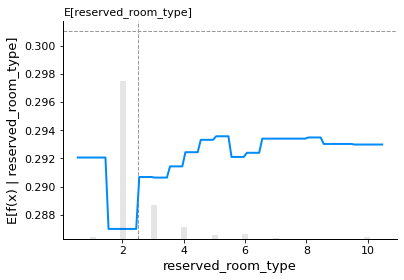

In [60]:
shap.plots.partial_dependence(
    "reserved_room_type", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

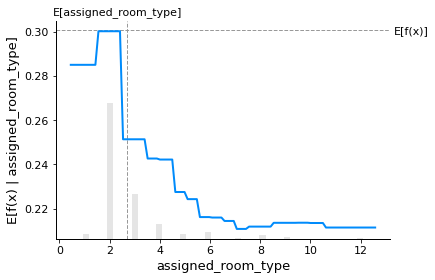

In [61]:
shap.plots.partial_dependence(
    "assigned_room_type",clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

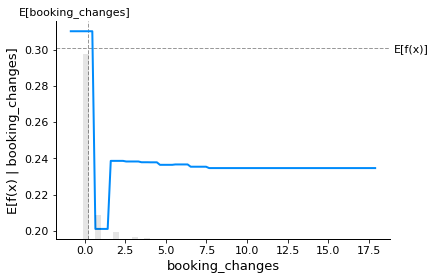

In [62]:
shap.plots.partial_dependence(
    "booking_changes", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

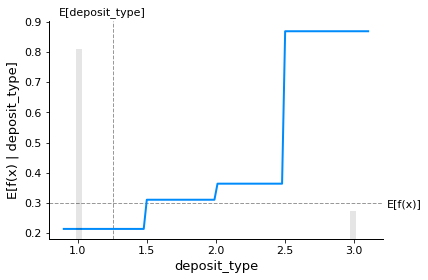

In [63]:
shap.plots.partial_dependence(
    "deposit_type", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

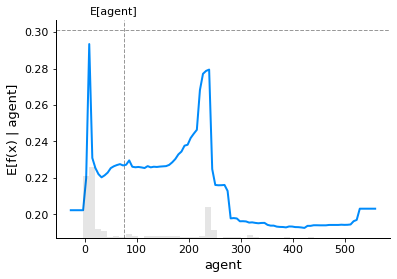

In [64]:
shap.plots.partial_dependence(
    "agent", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

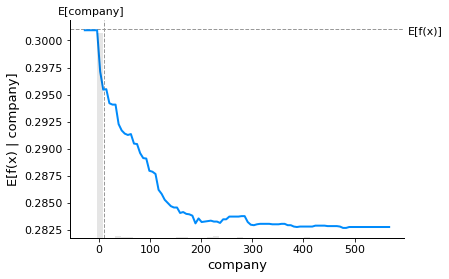

In [65]:
shap.plots.partial_dependence(
    "company", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

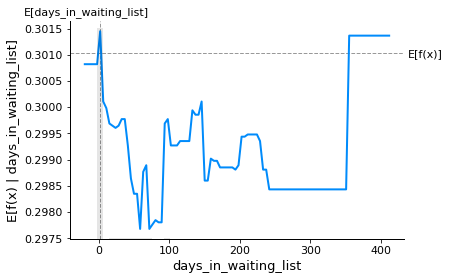

In [66]:
shap.plots.partial_dependence(
    "days_in_waiting_list", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

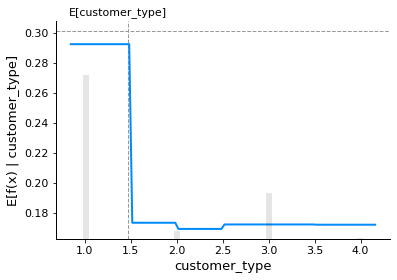

In [67]:
shap.plots.partial_dependence(
    "customer_type", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

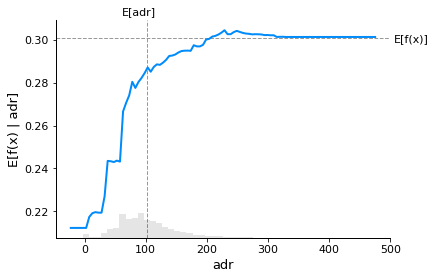

In [68]:
# Average Daily Rate
shap.plots.partial_dependence(
    "adr", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

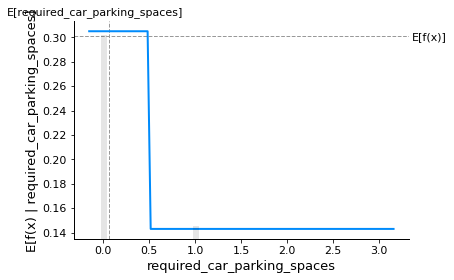

In [69]:
shap.plots.partial_dependence(
    "required_car_parking_spaces", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

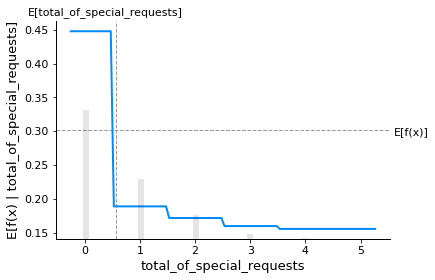

In [70]:
shap.plots.partial_dependence(
    "total_of_special_requests", clf_rcf_tun.predict, X_test, ice=False,
    model_expected_value=True, feature_expected_value=True
)

# Shapley Additive Explanations

In [72]:
# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(clf_rcf_tun)

In [73]:
# The explainer base values
explainer.expected_value

array([0.63113473, 0.36886527])

# SHAP INSTANCE 1

In [78]:
#Shap additive explanation
# Select an instance to explain
booking_ID = 30946
choosen_booking = X_test.loc[[booking_ID]]
#choosen_booking.lead_time =80
#choosen_booking.deposit_type=3
choosen_booking

hotel  lead_time  arrival_date_year  arrival_date_month  \
30946      1        203               2016                  12   

       arrival_date_week_number  arrival_date_day_of_month  \
30946                        49                          2   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
30946                        2                     5       2       0.0  ...   

       assigned_room_type  booking_changes  deposit_type  agent  company  \
30946                   6                4             1  250.0      0.0   

       days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
30946                     0              1  66.8                            0   

       total_of_special_requests  
30946                          0  

[1 rows x 28 columns]

In [79]:
#probability prediction of instance 30946 i.e actual prediction of the classifier f(x)=0 -not cancelled
y_pred_rfc_sample = clf_rcf_tun.predict_proba(X_test)
y_pred_rfc_sample

array([[0.76664392, 0.23335608],
       [0.33118647, 0.66881353],
       [0.93329437, 0.06670563],
       ...,
       [0.92248926, 0.07751074],
       [0.78593032, 0.21406968],
       [0.13513405, 0.86486595]])

In [80]:
# Calculate Shap values
#choosen_booking = X_test.loc[[booking_ID]]
shap_values = explainer(choosen_booking)
#print(shap_values)
shap.initjs()
# class not cancelled [0]
shap.force_plot(explainer.expected_value[0], shap_values[0,:,0].values, choosen_booking)

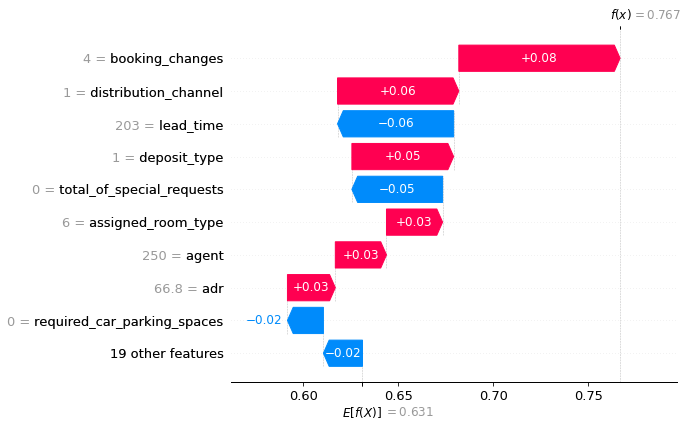

In [81]:
shap.plots.waterfall(shap_values[0,:,0])

# SHAP MODIFIED INSTACE 1

In [88]:
# Modified instance to explain
booking_ID = 30946
choosen_booking_1 = X_test.loc[[booking_ID]]
choosen_booking_1.lead_time =80
choosen_booking_1.deposit_type=3
choosen_booking_1

hotel  lead_time  arrival_date_year  arrival_date_month  \
30946      1         80               2016                  12   

       arrival_date_week_number  arrival_date_day_of_month  \
30946                        49                          2   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
30946                        2                     5       2       0.0  ...   

       assigned_room_type  booking_changes  deposit_type  agent  company  \
30946                   6                4             3  250.0      0.0   

       days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
30946                     0              1  66.8                            0   

       total_of_special_requests  
30946                          0  

[1 rows x 28 columns]

In [90]:
#Shap additive explanation for Counterfactual
# shap force plot and waterfall plot for modified instance
shap_values = explainer(choosen_booking_1)
shap.initjs()
# class not cancelled [0]
shap.force_plot(explainer.expected_value[0], shap_values[0,:,0].values, choosen_booking_1)

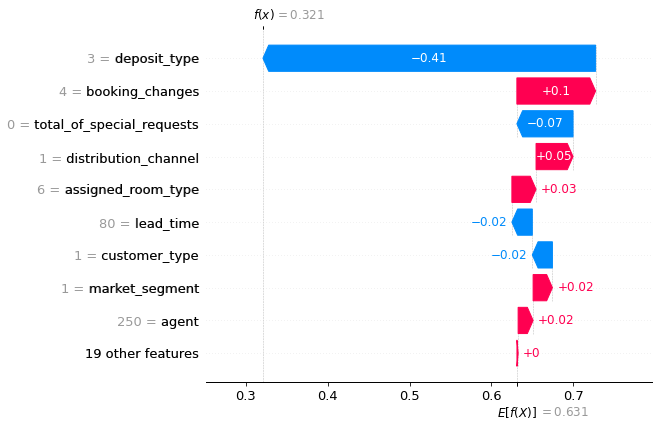

In [91]:
shap.plots.waterfall(shap_values[0,:,0])

# SHAP Insatance 2

In [109]:
#Shap additive explanation
# Select an instance to explain
booking_ID_2 = 40207
choosen_booking_2 = X_test.loc[[booking_ID_2]]
choosen_booking_2

hotel  lead_time  arrival_date_year  arrival_date_month  \
40207      0         82               2015                   7   

       arrival_date_week_number  arrival_date_day_of_month  \
40207                        29                         16   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
40207                        0                     3       2       0.0  ...   

       assigned_room_type  booking_changes  deposit_type  agent  company  \
40207                   2                0             1    9.0      0.0   

       days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
40207                     0              1  76.5                            0   

       total_of_special_requests  
40207                          0  

[1 rows x 28 columns]

In [110]:
# Calculate Shap values
choosen_booking = X_test.loc[[booking_ID_2]]
shap_values = explainer(choosen_booking_2)
shap.initjs()
# class cancelled [1]
shap.force_plot(explainer.expected_value[1], shap_values[0,:,1].values, choosen_booking)

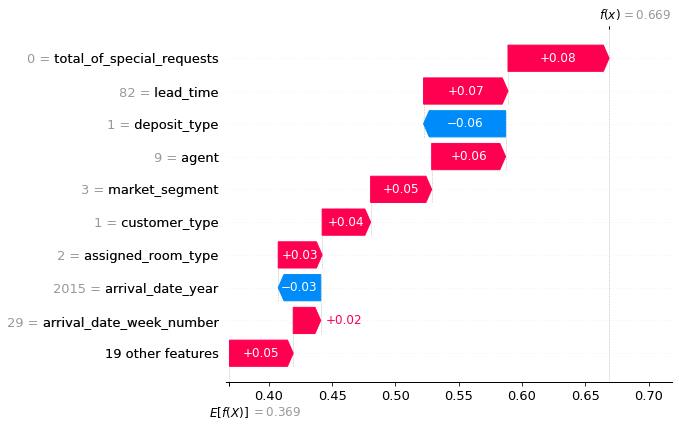

In [111]:
shap.plots.waterfall(shap_values[0,:,1])

# SHAP MODIFIED INSTANCE 2

In [115]:
#Counterfactual for instance2
#Shap additive explanation
# Select an instance to explain
booking_ID_2 = 40207
choosen_booking_3 = X_test.loc[[booking_ID_2]]
choosen_booking_3.total_of_special_requests =3
choosen_booking_3.deposit_type=2
choosen_booking_3.previous_cancellation =1

hotel  lead_time  arrival_date_year  arrival_date_month  \
40207      0          2               2015                   7   

       arrival_date_week_number  arrival_date_day_of_month  \
40207                        29                         16   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
40207                        0                     3       2       0.0  ...   

       assigned_room_type  booking_changes  deposit_type  agent  company  \
40207                   2                0             2    9.0      0.0   

       days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
40207                     0              1  76.5                            0   

       total_of_special_requests  
40207                          3  

[1 rows x 28 columns]

In [116]:
#Shap additive explanation for Counterfactual
# shap force plot and waterfall plot for modified instance
shap_values = explainer(choosen_booking_3)
shap.initjs()
# class cancelled [1]
shap.force_plot(explainer.expected_value[1], shap_values[0,:,1].values, choosen_booking_3)

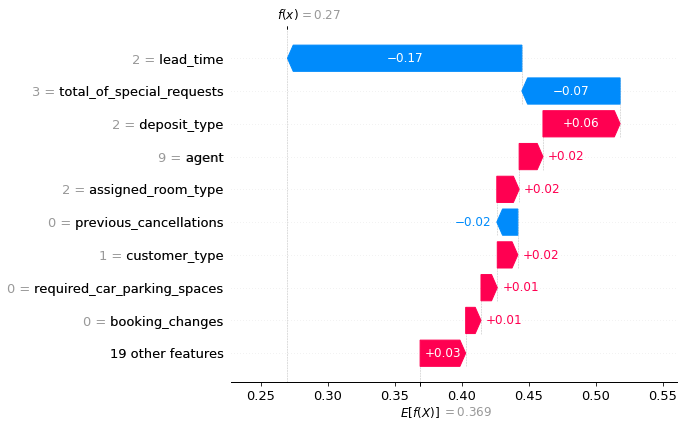

In [117]:
shap.plots.waterfall(shap_values[0,:,1])

# SHAP VALUES COMPUTATION

In [118]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(clf_rcf_tun.predict, X_test)
shap_values = explainer(X_test)


Permutation explainer: 23879it [3:21:44,  1.97it/s]                                


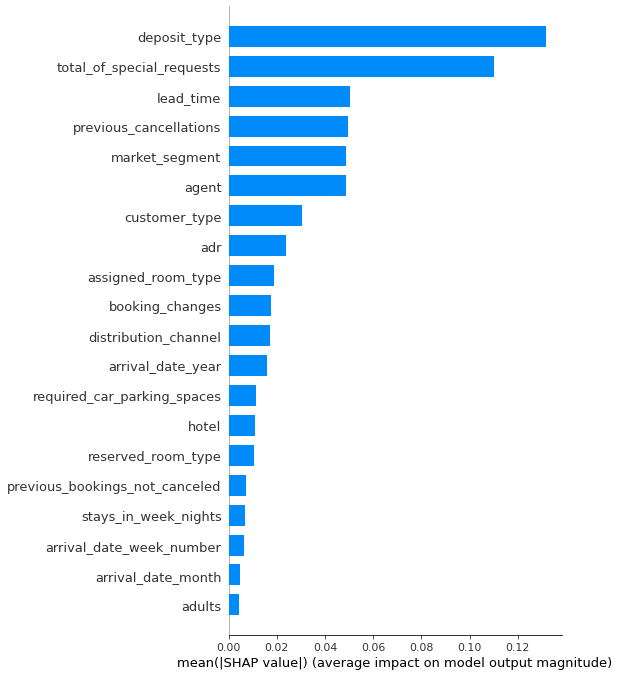

In [119]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

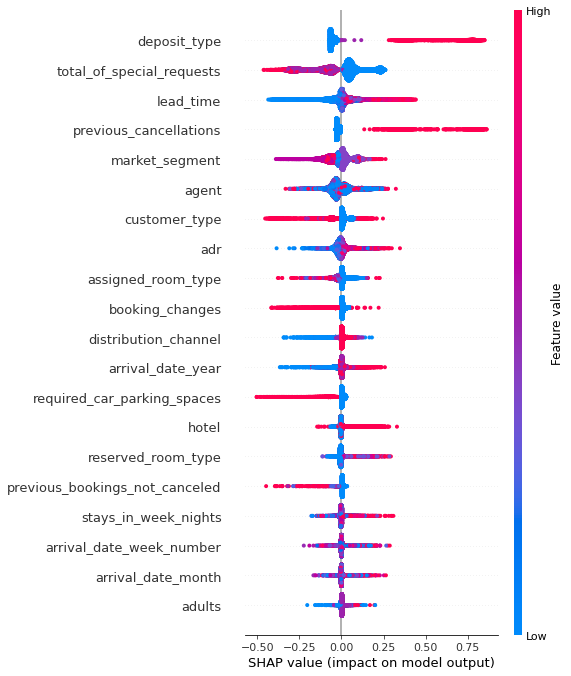

In [120]:
shap.summary_plot(shap_values, X_test)

# Local Interpretable Model-Agnostic Explanations 

In [148]:
import lime
import lime.lime_tabular

In [149]:
booking_ID = 48376
choosen_booking_lime=X_test.loc[[booking_ID]]
choosen_booking_lime

hotel  lead_time  arrival_date_year  arrival_date_month  \
48376      0        251               2016                   3   

       arrival_date_week_number  arrival_date_day_of_month  \
48376                        13                         22   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
48376                        0                     3       1       0.0  ...   

       assigned_room_type  booking_changes  deposit_type  agent  company  \
48376                   2                0             3   29.0      0.0   

       days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
48376                    93              1  90.0                            0   

       total_of_special_requests  
48376                          0  

[1 rows x 28 columns]

In [150]:
predict_fn_rf = lambda x: clf_rcf_tun.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['Not Cancelled','Cancelled'],kernel_width=5)
choosen_instance = X_test.loc[[booking_ID]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

In [151]:
#Modified same instance for Couterfactual
booking_ID = 48376
choosen_booking_lime_1=X_test.loc[[booking_ID]]
choosen_booking_lime_1.deposit_type = 1
choosen_booking_lime_1.customer_type = 2
choosen_booking_lime_1.days_in_waiting_list = 20
choosen_booking_lime_1.lead_time= 100
choosen_booking_lime_1.total_of_special_requests = 3
choosen_booking_lime_1

hotel  lead_time  arrival_date_year  arrival_date_month  \
48376      0        100               2016                   3   

       arrival_date_week_number  arrival_date_day_of_month  \
48376                        13                         22   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
48376                        0                     3       1       0.0  ...   

       assigned_room_type  booking_changes  deposit_type  agent  company  \
48376                   2                0             1   29.0      0.0   

       days_in_waiting_list  customer_type   adr  required_car_parking_spaces  \
48376                    20              2  90.0                            0   

       total_of_special_requests  
48376                          3  

[1 rows x 28 columns]

In [152]:
redict_fn_rf = lambda x: clf_rcf_tun.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['Not Cancelled','Cancelled'],kernel_width=5)
choosen_instance = choosen_booking_lime_1.values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)